In [31]:
# Bloc 4.1 – Calcul de T_log(n_W, d) à partir de Tlog_inputs_W.csv

import pandas as pd
import numpy as np
from pathlib import Path

# 4.1.1 – Chemins des fichiers d'entrée/sortie
TLOG_INPUTS_DIR = PHASE2_ROOT / "data_phase2" / "tlog_inputs"
TLOG_RESULTS_DIR = PHASE2_ROOT / "data_phase2" / "tlog_results"

TLOG_INPUTS_W_PATH = TLOG_INPUTS_DIR / "Tlog_inputs_W.csv"
TLOG_RESULTS_DIR.mkdir(parents=True, exist_ok=True)
TLOG_VALUES_W_PATH = TLOG_RESULTS_DIR / "Tlog_values_W.csv"

print("Fichier d'entrée T_log attendu :")
print(f"  - {TLOG_INPUTS_W_PATH}")

if not TLOG_INPUTS_W_PATH.exists():
    raise FileNotFoundError(
        f"Tlog_inputs_W.csv est introuvable à : {TLOG_INPUTS_W_PATH}.\n"
        "Assurez-vous d'avoir exécuté le Bloc 4.0."
    )

# 4.1.2 – Chargement des entrées T_log
df_tlog_inputs = pd.read_csv(TLOG_INPUTS_W_PATH)

print("\nAperçu de Tlog_inputs_W.csv :")
display(df_tlog_inputs)

required_cols = [
    "series",
    "W",
    "n_points_per_window",
    "method_id",
    "d_est",
    "d_est_80",
    "d_est_90",
    "d_ci_internal_low",
    "d_ci_internal_high",
    "d_ci_external_low",
    "d_ci_external_high",
]
missing = [c for c in required_cols if c not in df_tlog_inputs.columns]
if missing:
    raise RuntimeError(
        f"Colonnes manquantes dans Tlog_inputs_W.csv : {missing}"
    )

# 4.1.3 – Calcul de T_log central
n = df_tlog_inputs["n_points_per_window"].astype(float)
d = df_tlog_inputs["d_est"].astype(float)

df_tlog = df_tlog_inputs.copy()
df_tlog["T_log"] = (d - 4.0) * np.log(n)

# 4.1.4 – Variantes basées sur d_est_80 et d_est_90 (si disponibles)
df_tlog["T_log_80"] = np.where(
    df_tlog["d_est_80"].notna(),
    (df_tlog["d_est_80"].astype(float) - 4.0) * np.log(n),
    np.nan,
)

df_tlog["T_log_90"] = np.where(
    df_tlog["d_est_90"].notna(),
    (df_tlog["d_est_90"].astype(float) - 4.0) * np.log(n),
    np.nan,
)

# 4.1.5 – Intervalles internes/externes (M4) propagés vers T_log
df_tlog["T_log_ci_internal_low"] = np.where(
    df_tlog["d_ci_internal_low"].notna(),
    (df_tlog["d_ci_internal_low"].astype(float) - 4.0) * np.log(n),
    np.nan,
)

df_tlog["T_log_ci_internal_high"] = np.where(
    df_tlog["d_ci_internal_high"].notna(),
    (df_tlog["d_ci_internal_high"].astype(float) - 4.0) * np.log(n),
    np.nan,
)

df_tlog["T_log_ci_external_low"] = np.where(
    df_tlog["d_ci_external_low"].notna(),
    (df_tlog["d_ci_external_low"].astype(float) - 4.0) * np.log(n),
    np.nan,
)

df_tlog["T_log_ci_external_high"] = np.where(
    df_tlog["d_ci_external_high"].notna(),
    (df_tlog["d_ci_external_high"].astype(float) - 4.0) * np.log(n),
    np.nan,
)

# 4.1.6 – Résumé et sauvegarde
df_tlog = df_tlog.sort_values(["W", "method_id"]).reset_index(drop=True)

print("\nTableau T_log par W et méthode :")
display(df_tlog)

df_tlog.to_csv(TLOG_VALUES_W_PATH, index=False)

print("\nFichier Tlog_values_W écrit à :")
print(f"  - {TLOG_VALUES_W_PATH}")

# 4.1.7 – Logging pour audit
log_message(
    "INFO",
    (
        "T_log(n_W, d) calculé pour chaque combinaison (W, méthode). "
        f"Fichier sauvegardé dans {TLOG_VALUES_W_PATH.name}"
    ),
    block="BLOC_4.1",
)
log_metric(
    "Tlog_values_W_rows",
    int(df_tlog.shape[0]),
    extra={
        "n_cols": int(df_tlog.shape[1]),
        "W_values": sorted(df_tlog["W"].unique().tolist()),
        "methods": sorted(df_tlog["method_id"].unique().tolist()),
    },
)

Fichier d'entrée T_log attendu :
  - C:\Users\zackd\OneDrive\Desktop\Phase2_Tlog_v0.5\SunspotPhase2Tlog\data_phase2\tlog_inputs\Tlog_inputs_W.csv

Aperçu de Tlog_inputs_W.csv :


,series,W,n_points_per_window,method_id,d_est,d_est_std,d_est_80,d_est_90,d_ci_internal_low,d_ci_internal_high,d_ci_external_low,d_ci_external_high,source_table
0,S0,60,60,M2_PR_ref,2.737305,0.005320,2.0,6.333333,NaN,NaN,NaN,NaN,M2_S0_PR_reference_by_W.csv
1,S0,60,60,M4_global_phase1,2.000000,NaN,NaN,NaN,1.38,1.75,1.07,4.42,M4_global_phase1_reference.csv
2,S0,132,132,M2_PR_ref,4.235884,0.009572,3.0,12.000000,NaN,NaN,NaN,NaN,M2_S0_PR_reference_by_W.csv
3,S0,132,132,M4_global_phase1,2.000000,NaN,NaN,NaN,1.38,1.75,1.07,4.42,M4_global_phase1_reference.csv
4,S0,264,264,M2_PR_ref,5.464764,0.015857,6.0,20.666667,NaN,NaN,NaN,NaN,M2_S0_PR_reference_by_W.csv
5,S0,264,264,M4_global_phase1,2.000000,NaN,NaN,NaN,1.38,1.75,1.07,4.42,M4_global_phase1_reference.csv



Tableau T_log par W et méthode :


,series,W,n_points_per_window,method_id,d_est,d_est_std,d_est_80,d_est_90,d_ci_internal_low,d_ci_internal_high,d_ci_external_low,d_ci_external_high,source_table,T_log,T_log_80,T_log_90,T_log_ci_internal_low,T_log_ci_internal_high,T_log_ci_external_low,T_log_ci_external_high
0,S0,60,60,M2_PR_ref,2.737305,0.005320,2.0,6.333333,NaN,NaN,NaN,NaN,M2_S0_PR_reference_by_W.csv,-5.169910,-8.188689,9.553471,NaN,NaN,NaN,NaN
1,S0,60,60,M4_global_phase1,2.000000,NaN,NaN,NaN,1.38,1.75,1.07,4.42,M4_global_phase1_reference.csv,-8.188689,NaN,NaN,-10.727183,-9.212275,-11.996430,1.719625
2,S0,132,132,M2_PR_ref,4.235884,0.009572,3.0,12.000000,NaN,NaN,NaN,NaN,M2_S0_PR_reference_by_W.csv,1.151774,-4.882802,39.062415,NaN,NaN,NaN,NaN
3,S0,132,132,M4_global_phase1,2.000000,NaN,NaN,NaN,1.38,1.75,1.07,4.42,M4_global_phase1_reference.csv,-9.765604,NaN,NaN,-12.792941,-10.986304,-14.306610,2.050777
4,S0,264,264,M2_PR_ref,5.464764,0.015857,6.0,20.666667,NaN,NaN,NaN,NaN,M2_S0_PR_reference_by_W.csv,8.167447,11.151898,92.932485,NaN,NaN,NaN,NaN
5,S0,264,264,M4_global_phase1,2.000000,NaN,NaN,NaN,1.38,1.75,1.07,4.42,M4_global_phase1_reference.csv,-11.151898,NaN,NaN,-14.608987,-12.545885,-16.337531,2.341899



Fichier Tlog_values_W écrit à :
  - C:\Users\zackd\OneDrive\Desktop\Phase2_Tlog_v0.5\SunspotPhase2Tlog\data_phase2\tlog_results\Tlog_values_W.csv
[STEP=29][INFO][BLOC_4.1] T_log(n_W, d) calculé pour chaque combinaison (W, méthode). Fichier sauvegardé dans Tlog_values_W.csv
[METRIC][Tlog_values_W_rows] = 6 (step=29)


### Bloc 4.2 – Première lecture des \( T_{\log}(n_W, d) \) par W et par méthode

À partir de `Tlog_values_W.csv`, nous observons pour S0 :

- **W = 60** (n = 60)  
  - M2\_PR\_ref (d ≈ 2.74) → \(T_{\log} \approx -5.17 < 0\) → **Divergence**.  
  - M4\_global (d ≈ 2.0) → \(T_{\log} \approx -8.19 < 0\) → Divergence également.  
  → Les deux méthodes sont **d’accord** sur le signe (T_log < 0).

- **W = 132** (n = 132)  
  - M2\_PR\_ref (d ≈ 4.24) → \(T_{\log} \approx +1.15 > 0\) → **Saturation légère**.  
    - Mais la borne `d_est_80 = 3` donne \(T_{\log\_80} \approx -4.88 < 0\).  
    - La borne `d_est_90 = 12` donne \(T_{\log\_90} \approx 39.1 \gg 0\).  
  - M4\_global (d ≈ 2.0) → \(T_{\log} \approx -9.77 < 0\) avec un intervalle interne strictement négatif.  
  → À cette échelle, M2 et M4 **ne sont plus alignées** sur le signe.

- **W = 264** (n = 264)  
  - M2\_PR\_ref (d ≈ 5.46) → \(T_{\log} \approx +8.17 > 0\) → **Saturation nette**.  
    - `d_est_80 = 6` → \(T_{\log\_80} \approx +11.15 > 0\).  
    - `d_est_90 \approx 20.67` → \(T_{\log\_90} \approx +92.93\).  
  - M4\_global (d ≈ 2.0) → \(T_{\log} \approx -11.15 < 0\), avec un intervalle interne toujours négatif.  
  → Le **conflit** entre M2 (Saturation) et M4 (Divergence) devient très marqué.

En résumé : pour les petites fenêtres (W = 60), la classification en **régime de Divergence** est
robuste (M2 et M4 sont cohérentes). À partir de W = 132 et plus encore W = 264, M2 (PR/PCA local)
pousse `d` au-dessus du seuil critique `d = 4` et fait basculer \(T_{\log}\) en **Saturation**, alors
que la référence globale M4 (Phase 1, d ≈ 2) maintient fermement un régime de Divergence.
Les blocs suivants 4.x exploreront cette tension méthodologique (échelle W, choix de d,
interprétation physique).

Fichier T_log (par W et méthode) attendu : C:\Users\zackd\OneDrive\Desktop\Phase2_Tlog_v0.5\SunspotPhase2Tlog\data_phase2\tlog_results\Tlog_values_W.csv



Aperçu complet de Tlog_values_W.csv :


,series,W,n_points_per_window,method_id,d_est,d_est_std,d_est_80,d_est_90,d_ci_internal_low,d_ci_internal_high,d_ci_external_low,d_ci_external_high,source_table,T_log,T_log_80,T_log_90,T_log_ci_internal_low,T_log_ci_internal_high,T_log_ci_external_low,T_log_ci_external_high
0,S0,60,60,M2_PR_ref,2.737305,0.005320,2.0,6.333333,NaN,NaN,NaN,NaN,M2_S0_PR_reference_by_W.csv,-5.169910,-8.188689,9.553471,NaN,NaN,NaN,NaN
1,S0,60,60,M4_global_phase1,2.000000,NaN,NaN,NaN,1.38,1.75,1.07,4.42,M4_global_phase1_reference.csv,-8.188689,NaN,NaN,-10.727183,-9.212275,-11.996430,1.719625
2,S0,132,132,M2_PR_ref,4.235884,0.009572,3.0,12.000000,NaN,NaN,NaN,NaN,M2_S0_PR_reference_by_W.csv,1.151774,-4.882802,39.062415,NaN,NaN,NaN,NaN
3,S0,132,132,M4_global_phase1,2.000000,NaN,NaN,NaN,1.38,1.75,1.07,4.42,M4_global_phase1_reference.csv,-9.765604,NaN,NaN,-12.792941,-10.986304,-14.306610,2.050777
4,S0,264,264,M2_PR_ref,5.464764,0.015857,6.0,20.666667,NaN,NaN,NaN,NaN,M2_S0_PR_reference_by_W.csv,8.167447,11.151898,92.932485,NaN,NaN,NaN,NaN
5,S0,264,264,M4_global_phase1,2.000000,NaN,NaN,NaN,1.38,1.75,1.07,4.42,M4_global_phase1_reference.csv,-11.151898,NaN,NaN,-14.608987,-12.545885,-16.337531,2.341899



Tableau compact T_log(W, méthode) :


method_id,W,M2_PR_ref,M4_global_phase1
0,60,-5.169910,-8.188689
1,132,1.151774,-9.765604
2,264,8.167447,-11.151898


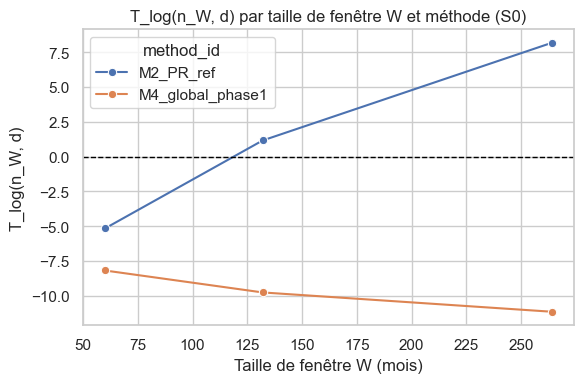

[STEP=30][INFO][BLOC_4.2] T_log(n_W, d) rechargé et tableau compact T_log(W, méthode) construit (Bloc 4.2).
[METRIC][Tlog_values_W_unique_W] = 3 (step=30)


In [32]:
# Bloc 4.2 – Lecture de Tlog_values_W.csv et tableau compact T_log(W, méthode)

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

# 4.2.1 – Chemin du fichier de résultats T_log
TLOG_RESULTS_DIR = PHASE2_ROOT / "data_phase2" / "tlog_results"
TLOG_VALUES_W_PATH = TLOG_RESULTS_DIR / "Tlog_values_W.csv"

print(f"Fichier T_log (par W et méthode) attendu : {TLOG_VALUES_W_PATH}")

if not TLOG_VALUES_W_PATH.exists():
    raise FileNotFoundError(
        f"Tlog_values_W.csv est introuvable à : {TLOG_VALUES_W_PATH}.\n"
        "Assurez-vous d'avoir exécuté le Bloc 4.1."
    )

# 4.2.2 – Chargement des résultats T_log
df_tlog = pd.read_csv(TLOG_VALUES_W_PATH)

print("\nAperçu complet de Tlog_values_W.csv :")
display(df_tlog)

# 4.2.3 – Tableau compact : T_log central par (W, méthode)
table_Tlog = (
    df_tlog[["series", "W", "method_id", "T_log"]]
    .pivot(index="W", columns="method_id", values="T_log")
    .reset_index()
)

print("\nTableau compact T_log(W, méthode) :")
display(table_Tlog)

# 4.2.4 – Préparation d'un plot T_log vs W par méthode
sns.set(style="whitegrid")

plt.figure(figsize=(6, 4))
ax = sns.lineplot(
    data=df_tlog,
    x="W",
    y="T_log",
    hue="method_id",
    marker="o"
)
ax.axhline(0.0, color="black", linestyle="--", linewidth=1)
ax.set_title("T_log(n_W, d) par taille de fenêtre W et méthode (S0)")
ax.set_xlabel("Taille de fenêtre W (mois)")
ax.set_ylabel("T_log(n_W, d)")
plt.tight_layout()
plt.show()

# 4.2.5 – Logging minimal pour audit
log_message(
    "INFO",
    "T_log(n_W, d) rechargé et tableau compact T_log(W, méthode) construit (Bloc 4.2).",
    block="BLOC_4.2",
)
log_metric(
    "Tlog_values_W_unique_W",
    int(df_tlog["W"].nunique()),
    extra={
        "W_values": sorted(df_tlog["W"].unique().tolist()),
        "methods": sorted(df_tlog["method_id"].unique().tolist()),
    },
)

### Bloc 4.3 – Discussion des régimes \( T_{\log}(n_W, d) \) (M2 vs M4)

Les résultats de `Tlog_values_W.csv` montrent une tension claire entre M2 (PR/PCA local sur fenêtres)
et M4 (dimension spectrale globale Phase 1) :

- **Pour W = 60** (n = 60) :
  - M2\_PR\_ref : d ≈ 2.74 → \(T_{\log} \approx -5.17 < 0\) → **Divergence**.
  - M4\_global : d ≈ 2.0 → \(T_{\log} \approx -8.19 < 0\) → Divergence également.
  → À petite échelle, les deux méthodes **convergent** vers un régime de Divergence, cohérent avec la Phase 1.

- **Pour W = 132** (n = 132) :
  - M2\_PR\_ref : d ≈ 4.24 → \(T_{\log} \approx +1.15 > 0\) (Saturation légère),
    mais la variante `d_est_80 = 3` donne encore \(T_{\log\_80} \approx -4.88 < 0\),
    tandis que `d_est_90 = 12` pousse \(T_{\log\_90} \approx 39.1 \gg 0\).
  - M4\_global : d ≈ 2.0 → \(T_{\log} \approx -9.77 < 0\), avec un intervalle interne strictement négatif.
  → À cette échelle intermédiaire, la classification T_log devient **sensible au choix de la méthode de d** :
     M2 peut déjà faire basculer le signe, alors que M4 reste fermement en Divergence.

- **Pour W = 264** (n = 264) :
  - M2\_PR\_ref : d ≈ 5.46 → \(T_{\log} \approx +8.17 > 0\), et `d_est_80 = 6`
    (\(T_{\log\_80} \approx +11.15\)) confirme un régime de **Saturation nette**.
    La borne haute `d_est_90 ≈ 20.67` donne \(T_{\log\_90} \approx 92.93\).
  - M4\_global : d ≈ 2.0 → \(T_{\log} \approx -11.15 < 0\), avec un intervalle interne toujours < 0.
  → À grande échelle, le **conflit est maximal** : M2 décrit un régime saturant, M4 un régime divergent.

Ces résultats posent une question centrale de la Phase 2 : **ce basculement de régime observé
avec M2 pour W = 132, 264 reflète‑t‑il une vraie transition dynamique liée à l’échelle temporelle,
ou bien une dérive méthodologique de l’estimation de d (PR/PCA) sur des fenêtres longues ?**

Pour tenter de répondre, il faudra :

- confronter ces valeurs à M3 (méthode spectrale sur le sous‑échantillon) et à la physique intuitive
  du système Sunspots (Phase 1) ;
- analyser la stabilité de M2 vis‑à‑vis de W et des composants principaux dominants (d_PR_80, d_PR_90) ;
- considérer M4 comme **ancre externe** : si M2(W) s’éloigne fortement de d ≈ 2 à grande échelle,
  il faut expliciter si on interprète cela comme un changement de régime réel ou comme une limite de M2.

Les blocs suivants 4.x se concentreront sur cette triangulation méthodologique et sur la manière
dont ces tensions doivent être prises en compte dans l’interprétation finale de \(T_{\log}\) pour les Sunspots.

## Bloc 5.0 – Analyse par phase de cycle (minima / maxima solaires)

Les Blocs 1–4 ont montré que :

- la classification \( T_{\log}(n, d) \) dépend fortement :
  - de la méthode utilisée pour estimer `d` (M1, M2, M3, M4) ;
  - de l’échelle temporelle \( W \) (60, 132, 264 mois) ;
- le système Sunspots n’est pas réductible à un seul `d` fixe :  
  à petite échelle (W = 60), M2 et M4 s’accordent sur un régime de Divergence (T_log < 0),  
  tandis qu’à grande échelle (W = 132, 264), M2 peut indiquer un régime de Saturation (T_log > 0) alors que M4 reste en Divergence.

Dans ce Bloc 5, nous introduisons explicitement la **phase de cycle solaire** (minima / maxima) dans l’analyse :

- en détectant approximativement les **minima** et **maxima** de la série S0 (sunspots mensuels) à partir d’une version lissée du signal ;
- en construisant un fichier de **marqueurs de cycle** `cycle_phase_markers.csv` qui liste les dates et niveaux des principaux minima/maxima détectés ;
- dans les blocs suivants (5.x), en associant chaque fenêtre (W, G) à une phase de cycle (min, rising, max, declining) pour étudier comment `d` et \( T_{\log} \) varient selon la phase.

L’objectif n’est pas de définir des cycles solaires “officiels”, mais de disposer d’une **approximation reproductible** des grandes phases (minima/maxima) pour mieux comprendre dans quelles conditions M1, M2, M3 et M4 sont cohérents ou en conflit, et comment les régimes \( T_{\log} \) se distribuent le long du cycle.

In [33]:
# Bloc 5.0 – Détection heuristique des minima/maxima de cycle sur S0
# et construction de cycle_phase_markers.csv

import pandas as pd
import numpy as np
from pathlib import Path

# 5.0.1 – Rechargement de la série S0 (Sunspots_clean) si nécessaire
DATA_PHASE2_CLEAN_DIR = PHASE2_ROOT / "data_phase2" / "sunspots_clean"
SUNSPOTS_CLEAN_CSV_PATH = DATA_PHASE2_CLEAN_DIR / "Sunspots_clean.csv"

if not SUNSPOTS_CLEAN_CSV_PATH.exists():
    raise FileNotFoundError(
        f"Sunspots_clean.csv est introuvable à : {SUNSPOTS_CLEAN_CSV_PATH}.\n"
        "Assurez-vous d'avoir exécuté les blocs 1.4 et 1.5."
    )

df_s0 = pd.read_csv(SUNSPOTS_CLEAN_CSV_PATH, parse_dates=["Date"])
df_s0 = df_s0.sort_values("Date").reset_index(drop=True)

value_col = "Monthly Mean Total Sunspot Number"

print("Résumé de la série S0 (Sunspots_clean) :")
print(df_s0.head())
print(f"\nNombre de points : {len(df_s0)}")

# 5.0.2 – Construction d'une série temporelle indexée par Date
df_ts = df_s0.set_index("Date")[value_col].to_frame(name=value_col)

# 5.0.3 – Lissage (rolling mean) pour faire ressortir les cycles (~11 ans)
SMOOTH_WINDOW_MONTHS = 13  # classique pour les taches solaires
df_ts["value_raw"] = df_ts[value_col]
df_ts["value_smooth"] = (
    df_ts[value_col]
    .rolling(window=SMOOTH_WINDOW_MONTHS, center=True, min_periods=1)
    .mean()
)

# 5.0.4 – Détection locale de maxima et minima sur la série lissée
smooth = df_ts["value_smooth"]

is_local_max = (smooth.shift(1) < smooth) & (smooth.shift(-1) <= smooth)
is_local_min = (smooth.shift(1) > smooth) & (smooth.shift(-1) >= smooth)

df_extrema = df_ts.copy()
df_extrema["is_local_max"] = is_local_max.fillna(False)
df_extrema["is_local_min"] = is_local_min.fillna(False)

candidates_max = df_extrema[df_extrema["is_local_max"]].copy()
candidates_min = df_extrema[df_extrema["is_local_min"]].copy()

print(f"\nNombre de maxima locaux (bruts) détectés : {len(candidates_max)}")
print(f"Nombre de minima locaux (bruts) détectés : {len(candidates_min)}")

# 5.0.5 – Sélection des grands maxima/minima avec une séparation minimale
#        pour approximer les principaux cycles (heuristique)

def select_extrema_with_min_separation(df_candidates, min_sep_months, kind="max"):
    """
    Sélectionne des extrêmes bien séparés à partir de candidats locaux.
    - df_candidates : DataFrame avec colonne 'value_smooth' et index Date.
    - min_sep_months : séparation minimale (en mois) entre deux extrêmes retenus.
    - kind : 'max' ou 'min' (utilisé uniquement pour info/debug).
    """
    # Tri par amplitude décroissante (pour garder les plus marqués)
    df_sorted = df_candidates.sort_values("value_smooth", ascending=(kind == "min")).copy()

    selected_rows = []
    selected_dates = []

    for idx, row in df_sorted.iterrows():
        date = idx
        if not selected_dates:
            selected_rows.append(row)
            selected_dates.append(date)
            continue

        keep = True
        for d in selected_dates:
            months_diff = abs((date.year - d.year) * 12 + (date.month - d.month))
            if months_diff < min_sep_months:
                keep = False
                break

        if keep:
            selected_rows.append(row)
            selected_dates.append(date)

    df_selected = pd.DataFrame(selected_rows)
    df_selected.index.name = "Date"
    df_selected = df_selected.sort_index().reset_index()
    return df_selected

MIN_CYCLE_SEPARATION_MONTHS = 90  # ~7.5 ans, pour ne pas sélectionner 2 pics trop proches

df_max_sel = select_extrema_with_min_separation(
    candidates_max, min_sep_months=MIN_CYCLE_SEPARATION_MONTHS, kind="max"
)
df_min_sel = select_extrema_with_min_separation(
    candidates_min, min_sep_months=MIN_CYCLE_SEPARATION_MONTHS, kind="min"
)

print(f"\nMaxima de cycle retenus (séparés de >= {MIN_CYCLE_SEPARATION_MONTHS} mois) :")
display(df_max_sel[["Date", "value_raw", "value_smooth"]])

print(f"\nMinima de cycle retenus (séparés de >= {MIN_CYCLE_SEPARATION_MONTHS} mois) :")
display(df_min_sel[["Date", "value_raw", "value_smooth"]])

# 5.0.6 – Construction du fichier de marqueurs de phase de cycle
df_max_sel = df_max_sel.assign(phase_type="max")
df_min_sel = df_min_sel.assign(phase_type="min")

df_markers = pd.concat([df_max_sel, df_min_sel], ignore_index=True)
df_markers = df_markers[["Date", "phase_type", "value_raw", "value_smooth"]]
df_markers = df_markers.sort_values("Date").reset_index(drop=True)
df_markers["marker_id"] = df_markers.index + 1

print("\nMarqueurs de phase de cycle (minima + maxima) :")
display(df_markers.head(20))

# 5.0.7 – Sauvegarde sur disque
CYCLE_DIR = PHASE2_ROOT / "data_phase2" / "cycle_markers"
CYCLE_DIR.mkdir(parents=True, exist_ok=True)

CYCLE_MARKERS_PATH = CYCLE_DIR / "cycle_phase_markers.csv"
df_markers.to_csv(CYCLE_MARKERS_PATH, index=False)

print("\nFichier de marqueurs de phase de cycle écrit à :")
print(f"  - {CYCLE_MARKERS_PATH}")

# 5.0.8 – Logging pour audit
log_message(
    "INFO",
    (
        "Marqueurs de phase de cycle (minima/maxima) construits à partir de S0 "
        f"avec fenêtre de lissage={SMOOTH_WINDOW_MONTHS} mois et séparation minimale="
        f"{MIN_CYCLE_SEPARATION_MONTHS} mois. Fichier sauvegardé dans {CYCLE_MARKERS_PATH.name}"
    ),
    block="BLOC_5.0",
)
log_metric(
    "cycle_phase_markers_count",
    int(df_markers.shape[0]),
    extra={
        "n_maxima": int((df_markers["phase_type"] == "max").sum()),
        "n_minima": int((df_markers["phase_type"] == "min").sum()),
        "smooth_window_months": SMOOTH_WINDOW_MONTHS,
        "min_cycle_separation_months": MIN_CYCLE_SEPARATION_MONTHS,
    },
)

Résumé de la série S0 (Sunspots_clean) :
        Date  Monthly Mean Total Sunspot Number
0 1749-01-31                               96.7
1 1749-02-28                              104.3
2 1749-03-31                              116.7
3 1749-04-30                               92.8
4 1749-05-31                              141.7

Nombre de points : 3265

Nombre de maxima locaux (bruts) détectés : 345
Nombre de minima locaux (bruts) détectés : 343

Maxima de cycle retenus (séparés de >= 90 mois) :


,Date,value_raw,value_smooth
0,1750-03-31,148.7,152.761538
1,1761-05-31,178.7,141.653846
2,1769-09-30,248.0,187.392308
3,1778-05-31,398.2,262.915385
4,1788-03-31,238.8,235.184615
5,1795-11-30,41.7,35.507692
6,1805-03-31,85.7,81.353846
7,1816-09-30,79.7,82.707692
8,1829-10-31,95.3,122.323077
9,1837-04-30,230.3,241.969231



Minima de cycle retenus (séparés de >= 90 mois) :


,Date,value_raw,value_smooth
0,1755-02-28,18.7,13.907692
1,1766-05-31,44.7,18.553846
2,1775-06-30,20.5,12.346154
3,1784-08-31,16.7,15.823077
4,1798-04-30,1.8,5.400000
5,1810-04-30,0.0,0.000000
6,1823-05-31,0.0,0.138462
7,1833-10-31,12.5,11.869231
8,1843-07-31,15.9,17.723077
9,1856-01-31,1.0,6.200000



Marqueurs de phase de cycle (minima + maxima) :


,Date,phase_type,value_raw,value_smooth,marker_id
0,1750-03-31,max,148.7,152.761538,1
1,1755-02-28,min,18.7,13.907692,2
2,1761-05-31,max,178.7,141.653846,3
3,1766-05-31,min,44.7,18.553846,4
4,1769-09-30,max,248.0,187.392308,5
5,1775-06-30,min,20.5,12.346154,6
6,1778-05-31,max,398.2,262.915385,7
7,1784-08-31,min,16.7,15.823077,8
8,1788-03-31,max,238.8,235.184615,9
9,1795-11-30,max,41.7,35.507692,10



Fichier de marqueurs de phase de cycle écrit à :
  - C:\Users\zackd\OneDrive\Desktop\Phase2_Tlog_v0.5\SunspotPhase2Tlog\data_phase2\cycle_markers\cycle_phase_markers.csv
[STEP=31][INFO][BLOC_5.0] Marqueurs de phase de cycle (minima/maxima) construits à partir de S0 avec fenêtre de lissage=13 mois et séparation minimale=90 mois. Fichier sauvegardé dans cycle_phase_markers.csv
[METRIC][cycle_phase_markers_count] = 51 (step=31)


### Bloc 5.1 – Association des fenêtres (W, G) aux phases de cycle solaire

Le Bloc 5.0 a construit un fichier de marqueurs de cycle :

- `data_phase2/cycle_markers/cycle_phase_markers.csv`

contenant des **maxima** et **minima** de la série S0 (sunspots mensuels), détectés sur une
version lissée (13 mois) avec une séparation minimale de 90 mois. Ce fichier donne une
approximation reproductible des grandes phases de cycle.

Dans ce Bloc 5.1, nous associons chaque **fenêtre temporelle** (définie en Bloc 2 via
[window_definitions.csv](cci:7://file:///c:/Users/zackd/OneDrive/Desktop/Phase2_Tlog_v0.5/SunspotPhase2Tlog/data_phase2/windows/window_definitions.csv:0:0-0:0)) à une phase de cycle, en procédant comme suit :

1. Pour chaque fenêtre, nous calculons une **date centrale** (`window_center_date`)
   à partir de `start_date` et `end_date`.
2. Nous rapprochons cette date centrale des marqueurs minima/maxima :
   - si elle se trouve à proximité (± ~6 mois) d’un minimum ou maximum,
     nous étiquetons la fenêtre directement comme `min` ou `max` ;
   - sinon, nous déterminons si la date centrale se situe entre :
     - un `min` et le `max` suivant → phase `rising` (montée vers le maximum) ;
     - un `max` et le `min` suivant → phase `declining` (descente vers le minimum).
3. Pour les fenêtres éventuelles avant le premier marqueur ou après le dernier,
   nous utilisons des étiquettes `pre_cycle` / `post_cycle`.

Le résultat est un fichier :

- `data_phase2/windows/windows_with_cycle_phase.csv`

qui reprend les métadonnées de chaque fenêtre (`window_id`, W, G, dates, etc.) et ajoute
une colonne `cycle_phase` (parmi `{min, max, rising, declining, pre_cycle, post_cycle}`).
Ce fichier permettra, dans les blocs 5.x suivants, d’analyser comment les estimations de `d`
(M1, M2, M3, M4) et les régimes \( T_{\log} \) se distribuent selon la phase du cycle solaire.

In [34]:
# Bloc 5.1 – Association des fenêtres (W, G) aux phases de cycle solaire

import pandas as pd
import numpy as np
from pathlib import Path

# 5.1.1 – Chemins des fichiers nécessaires
WINDOWS_DIR = PHASE2_ROOT / "data_phase2" / "windows"
WINDOW_DEFS_PATH = WINDOWS_DIR / "window_definitions.csv"

CYCLE_DIR = PHASE2_ROOT / "data_phase2" / "cycle_markers"
CYCLE_MARKERS_PATH = CYCLE_DIR / "cycle_phase_markers.csv"

WINDOWS_PHASE_PATH = WINDOWS_DIR / "windows_with_cycle_phase.csv"

print("Fichiers attendus :")
print(f"  - window_definitions : {WINDOW_DEFS_PATH}")
print(f"  - cycle_phase_markers : {CYCLE_MARKERS_PATH}")

if not WINDOW_DEFS_PATH.exists():
    raise FileNotFoundError(
        f"window_definitions.csv est introuvable à : {WINDOW_DEFS_PATH}.\n"
        "Assurez-vous d'avoir exécuté le bloc de définition des fenêtres (Bloc 2.x)."
    )

if not CYCLE_MARKERS_PATH.exists():
    raise FileNotFoundError(
        f"cycle_phase_markers.csv est introuvable à : {CYCLE_MARKERS_PATH}.\n"
        "Assurez-vous d'avoir exécuté le Bloc 5.0."
    )

# 5.1.2 – Chargement des définitions de fenêtres et des marqueurs de cycle
df_windows = pd.read_csv(WINDOW_DEFS_PATH, parse_dates=["start_date", "end_date"])
df_markers = pd.read_csv(CYCLE_MARKERS_PATH, parse_dates=["Date"])

df_markers = df_markers.sort_values("Date").reset_index(drop=True)

print("\nAperçu de window_definitions.csv :")
display(df_windows.head())

print("\nAperçu de cycle_phase_markers.csv :")
display(df_markers.head())

required_win_cols = ["window_id", "window_size_months", "stride_months",
                     "start_date", "end_date", "n_points"]
missing_win = [c for c in required_win_cols if c not in df_windows.columns]
if missing_win:
    raise RuntimeError(
        f"Colonnes manquantes dans window_definitions.csv : {missing_win}"
    )

required_mark_cols = ["Date", "phase_type"]
missing_mark = [c for c in required_mark_cols if c not in df_markers.columns]
if missing_mark:
    raise RuntimeError(
        f"Colonnes manquantes dans cycle_phase_markers.csv : {missing_mark}"
    )

# 5.1.3 – Calcul de la date centrale de chaque fenêtre
df_windows["window_center_date"] = df_windows["start_date"] + (
    df_windows["end_date"] - df_windows["start_date"]
) / 2

# 5.1.4 – Paramètres de proximité autour des minima/maxima
NEAR_MONTHS = 6
NEAR_DAYS = NEAR_MONTHS * 31  # approximation simple pour ± ~6 mois

# 5.1.5 – Fonction d'affectation de phase
markers_dates = df_markers["Date"]
markers_phase = df_markers["phase_type"]

first_marker_date = markers_dates.iloc[0]
last_marker_date = markers_dates.iloc[-1]

def assign_cycle_phase(center_date):
    """
    Assigne une phase de cycle à partir des marqueurs min/max :
      - 'min' ou 'max' si centre proche (± NEAR_MONTHS) d'un marqueur,
      - 'rising' si entre un min et le max suivant,
      - 'declining' si entre un max et le min suivant,
      - 'pre_cycle' avant le premier marqueur,
      - 'post_cycle' après le dernier marqueur.
    """
    # 1) Proximité directe d'un marqueur
    diffs_days = (markers_dates - center_date).abs().dt.days
    nearest_idx = diffs_days.idxmin()
    nearest_days = diffs_days.loc[nearest_idx]
    nearest_phase = markers_phase.loc[nearest_idx]

    if nearest_days <= NEAR_DAYS:
        return nearest_phase  # 'min' ou 'max'

    # 2) Cas avant le premier marqueur / après le dernier
    if center_date < first_marker_date:
        return "pre_cycle"
    if center_date > last_marker_date:
        return "post_cycle"

    # 3) Cas général : entre deux marqueurs successifs
    #    On cherche le dernier marqueur avant center_date et le premier après.
    prev_mask = markers_dates <= center_date
    next_mask = markers_dates >= center_date

    if not prev_mask.any() or not next_mask.any():
        # sécurité, même si les cas extrêmes sont traités plus haut
        return "unknown"

    prev_idx = markers_dates[prev_mask].index.max()
    next_idx = markers_dates[next_mask].index.min()

    prev_type = markers_phase.loc[prev_idx]
    next_type = markers_phase.loc[next_idx]

    if prev_type == "min" and next_type == "max":
        return "rising"
    elif prev_type == "max" and next_type == "min":
        return "declining"
    else:
        # Cas rares où deux min ou deux max se suivraient dans les marqueurs,
        # on les traite comme 'unknown' pour rester prudents.
        return "unknown"

# 5.1.6 – Application aux fenêtres
df_windows["cycle_phase"] = df_windows["window_center_date"].apply(assign_cycle_phase)

print("\nAperçu des fenêtres avec phase de cycle associée :")
display(df_windows.head(10))

# 5.1.7 – Sauvegarde du fichier windows_with_cycle_phase.csv
df_windows.to_csv(WINDOWS_PHASE_PATH, index=False)

print("\nFichier windows_with_cycle_phase.csv écrit à :")
print(f"  - {WINDOWS_PHASE_PATH}")

# 5.1.8 – Logging pour audit
phase_counts = df_windows["cycle_phase"].value_counts().to_dict()

log_message(
    "INFO",
    (
        "Fenêtres (W, G) associées à des phases de cycle (min/max/rising/declining/"
        "pre_cycle/post_cycle). Fichier sauvegardé dans "
        f"{WINDOWS_PHASE_PATH.name}"
    ),
    block="BLOC_5.1",
)
log_metric(
    "windows_with_cycle_phase_count",
    int(df_windows.shape[0]),
    extra={
        "phase_counts": phase_counts,
        "near_months": NEAR_MONTHS,
    },
)

Fichiers attendus :
  - window_definitions : C:\Users\zackd\OneDrive\Desktop\Phase2_Tlog_v0.5\SunspotPhase2Tlog\data_phase2\windows\window_definitions.csv
  - cycle_phase_markers : C:\Users\zackd\OneDrive\Desktop\Phase2_Tlog_v0.5\SunspotPhase2Tlog\data_phase2\cycle_markers\cycle_phase_markers.csv

Aperçu de window_definitions.csv :


,window_id,window_size_months,stride_months,start_index,end_index,start_date,end_date,n_points
0,0,60,1,0,59,1749-01-31,1753-12-31,60
1,1,60,1,1,60,1749-02-28,1754-01-31,60
2,2,60,1,2,61,1749-03-31,1754-02-28,60
3,3,60,1,3,62,1749-04-30,1754-03-31,60
4,4,60,1,4,63,1749-05-31,1754-04-30,60



Aperçu de cycle_phase_markers.csv :


,Date,phase_type,value_raw,value_smooth,marker_id
0,1750-03-31,max,148.7,152.761538,1
1,1755-02-28,min,18.7,13.907692,2
2,1761-05-31,max,178.7,141.653846,3
3,1766-05-31,min,44.7,18.553846,4
4,1769-09-30,max,248.0,187.392308,5



Aperçu des fenêtres avec phase de cycle associée :


,window_id,window_size_months,stride_months,start_index,end_index,start_date,end_date,n_points,window_center_date,cycle_phase
0,0,60,1,0,59,1749-01-31,1753-12-31,60,1751-07-17 12:00:00,declining
1,1,60,1,1,60,1749-02-28,1754-01-31,60,1751-08-16 00:00:00,declining
2,2,60,1,2,61,1749-03-31,1754-02-28,60,1751-09-14 12:00:00,declining
3,3,60,1,3,62,1749-04-30,1754-03-31,60,1751-10-15 00:00:00,declining
4,4,60,1,4,63,1749-05-31,1754-04-30,60,1751-11-14 12:00:00,declining
5,5,60,1,5,64,1749-06-30,1754-05-31,60,1751-12-15 00:00:00,declining
6,6,60,1,6,65,1749-07-31,1754-06-30,60,1752-01-14 12:00:00,declining
7,7,60,1,7,66,1749-08-31,1754-07-31,60,1752-02-14 12:00:00,declining
8,8,60,1,8,67,1749-09-30,1754-08-31,60,1752-03-16 00:00:00,declining
9,9,60,1,9,68,1749-10-31,1754-09-30,60,1752-04-15 12:00:00,declining



Fichier windows_with_cycle_phase.csv écrit à :
  - C:\Users\zackd\OneDrive\Desktop\Phase2_Tlog_v0.5\SunspotPhase2Tlog\data_phase2\windows\windows_with_cycle_phase.csv
[STEP=32][INFO][BLOC_5.1] Fenêtres (W, G) associées à des phases de cycle (min/max/rising/declining/pre_cycle/post_cycle). Fichier sauvegardé dans windows_with_cycle_phase.csv
[METRIC][windows_with_cycle_phase_count] = 11682 (step=32)


### Bloc 5.2 – Exploration de `d_M1` par phase de cycle solaire

Nous disposons maintenant de :

- `data_phase2/windows/windows_with_cycle_phase.csv`  
  (toutes les fenêtres S0 avec leurs métadonnées et une phase de cycle
  `cycle_phase ∈ {min, max, rising, declining, pre_cycle, post_cycle}`) ;
- [data_phase2/d_estimates/M1_S0_all_windows_per_k.csv](cci:7://file:///c:/Users/zackd/OneDrive/Desktop/Phase2_Tlog_v0.5/SunspotPhase2Tlog/data_phase2/d_estimates/M1_S0_all_windows_per_k.csv:0:0-0:0)  
  (résumé M1 Levina–Bickel sur **toutes les fenêtres**, agrégé par
  `(window_size_months, stride_months, k)` avec `d_hat_k` et `n_windows`).

Important : [M1_S0_all_windows_per_k.csv](cci:7://file:///c:/Users/zackd/OneDrive/Desktop/Phase2_Tlog_v0.5/SunspotPhase2Tlog/data_phase2/d_estimates/M1_S0_all_windows_per_k.csv:0:0-0:0) ne contient **pas** les estimations
par fenêtre individuelle, mais une valeur `d_hat_k` moyenne (ou agrégée)
pour chaque triplet `(W, G, k)` sur l’ensemble des fenêtres. On ne peut donc
pas mesurer directement une variation de `d_M1` *entre phases* ; en revanche,
on peut :

- documenter la **répartition des fenêtres** par phase de cycle pour chaque `(W, G)` ;
- associer à chaque combinaison `(W, G, k, cycle_phase)` la valeur globale
  `d_hat_k` et le nombre de fenêtres dans cette phase ;
- préparer le terrain pour une éventuelle ré‑estimation M1 par fenêtre si
  l’on souhaite plus tard analyser un vrai `d_M1(window, phase)`.

Dans ce Bloc 5.2, nous construisons un premier tableau :

- `series`, `window_size_months` (W), `stride_months` (G) ;
- `k`, `d_hat_k`, `n_windows_total` (M1, toutes fenêtres) ;
- `cycle_phase`, `n_windows_phase`, `frac_windows_in_phase`.

Nous affichons ce tableau et produisons quelques figures simples
(répartition des fenêtres par phase et par W) pour visualiser comment
les données de Sunspots occupent les différentes phases du cycle solaire.
Cela permet de voir, par exemple, si certaines tailles de fenêtre
sont principalement situées autour de maxima ou de minima, ce qui est
crucial pour interpréter les estimations de `d` et les régimes \(T_{\log}\).

Fichiers attendus :
  - windows_with_cycle_phase : C:\Users\zackd\OneDrive\Desktop\Phase2_Tlog_v0.5\SunspotPhase2Tlog\data_phase2\windows\windows_with_cycle_phase.csv
  - M1_S0_all_windows_per_k  : C:\Users\zackd\OneDrive\Desktop\Phase2_Tlog_v0.5\SunspotPhase2Tlog\data_phase2\d_estimates\M1_S0_all_windows_per_k.csv

Aperçu de windows_with_cycle_phase.csv :


,window_id,window_size_months,stride_months,start_index,end_index,start_date,end_date,n_points,window_center_date,cycle_phase
0,0,60,1,0,59,1749-01-31,1753-12-31,60,1751-07-17 12:00:00,declining
1,1,60,1,1,60,1749-02-28,1754-01-31,60,1751-08-16 00:00:00,declining
2,2,60,1,2,61,1749-03-31,1754-02-28,60,1751-09-14 12:00:00,declining
3,3,60,1,3,62,1749-04-30,1754-03-31,60,1751-10-15 00:00:00,declining
4,4,60,1,4,63,1749-05-31,1754-04-30,60,1751-11-14 12:00:00,declining



Aperçu de M1_S0_all_windows_per_k.csv :


,series,window_size_months,stride_months,k,d_hat_k,n_windows
0,S0,60,1,5,25.208994,3206
1,S0,60,1,6,22.196648,3206
2,S0,60,1,7,20.473032,3206
3,S0,60,1,8,19.212719,3206
4,S0,60,1,9,18.412378,3206



Vérification des totaux de fenêtres (windows vs M1) :


,window_size_months,stride_months,n_windows_total_from_windows,n_windows_total_from_M1
0,60,1,3206,3206
1,60,6,535,535
2,60,12,268,268
3,132,1,3134,3134
4,132,6,523,523
5,132,12,262,262
6,264,1,3002,3002
7,264,6,501,501
8,264,12,251,251



Tableau d_M1(W, k, cycle_phase) agrégé :


,W,G,cycle_phase,n_windows_phase,series,k,d_hat_k,n_windows,n_windows_total_from_M1,frac_windows_in_phase
0,60,1,declining,1542,S0,5,25.208994,3206,3206,0.480973
1,60,1,declining,1542,S0,6,22.196648,3206,3206,0.480973
2,60,1,declining,1542,S0,7,20.473032,3206,3206,0.480973
3,60,1,declining,1542,S0,8,19.212719,3206,3206,0.480973
4,60,1,declining,1542,S0,9,18.412378,3206,3206,0.480973
5,60,1,declining,1542,S0,10,17.935439,3206,3206,0.480973
6,60,1,declining,1542,S0,11,17.428452,3206,3206,0.480973
7,60,1,declining,1542,S0,12,17.042728,3206,3206,0.480973
8,60,1,declining,1542,S0,13,16.695787,3206,3206,0.480973
9,60,1,declining,1542,S0,14,16.451767,3206,3206,0.480973



Fichier d_M1(W, k, cycle_phase) écrit à :
  - C:\Users\zackd\OneDrive\Desktop\Phase2_Tlog_v0.5\SunspotPhase2Tlog\data_phase2\d_estimates\by_cycle_phase\M1_S0_d_by_W_k_cycle_phase.csv


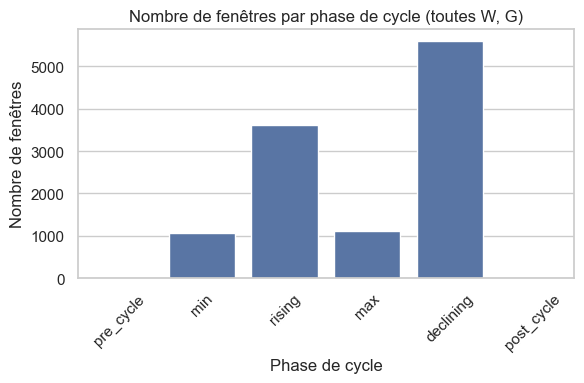

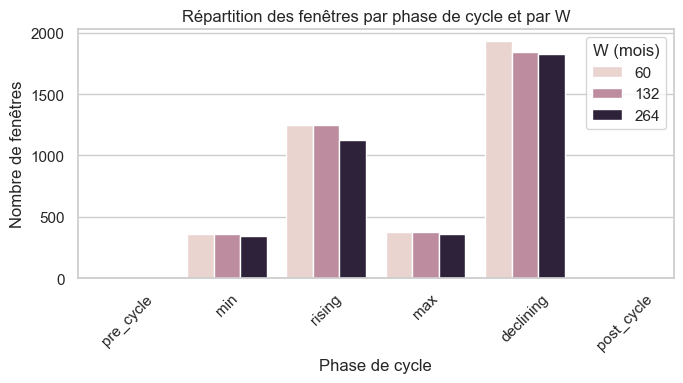

[STEP=33][INFO][BLOC_5.2] Tableau agrégé d_M1(W, k, cycle_phase) construit à partir de windows_with_cycle_phase.csv et M1_S0_all_windows_per_k.csv. Fichier sauvegardé dans M1_S0_d_by_W_k_cycle_phase.csv
[METRIC][M1_d_by_W_k_cycle_phase_rows] = 720 (step=33)


In [35]:
# Bloc 5.2 – Tableau d_M1(W, k, cycle_phase) (agrégé) et premières figures

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pathlib import Path

# 5.2.1 – Chemins des fichiers nécessaires
WINDOWS_DIR = PHASE2_ROOT / "data_phase2" / "windows"
WINDOWS_PHASE_PATH = WINDOWS_DIR / "windows_with_cycle_phase.csv"

D_ESTIMATES_DIR = PHASE2_ROOT / "data_phase2" / "d_estimates"
M1_ALL_PER_K_PATH = D_ESTIMATES_DIR / "M1_S0_all_windows_per_k.csv"

print("Fichiers attendus :")
print(f"  - windows_with_cycle_phase : {WINDOWS_PHASE_PATH}")
print(f"  - M1_S0_all_windows_per_k  : {M1_ALL_PER_K_PATH}")

if not WINDOWS_PHASE_PATH.exists():
    raise FileNotFoundError(
        f"windows_with_cycle_phase.csv est introuvable à : {WINDOWS_PHASE_PATH}.\n"
        "Assurez-vous d'avoir exécuté le Bloc 5.1."
    )

if not M1_ALL_PER_K_PATH.exists():
    raise FileNotFoundError(
        f"M1_S0_all_windows_per_k.csv est introuvable à : {M1_ALL_PER_K_PATH}.\n"
        "Assurez-vous d'avoir exécuté le bloc M1 all windows (Bloc 3.16)."
    )

# 5.2.2 – Chargement des fenêtres annotées par phase et du résumé M1_all_per_k
df_windows_phase = pd.read_csv(
    WINDOWS_PHASE_PATH,
    parse_dates=["start_date", "end_date", "window_center_date"],
)
df_m1_all = pd.read_csv(M1_ALL_PER_K_PATH)

print("\nAperçu de windows_with_cycle_phase.csv :")
display(df_windows_phase.head())

print("\nAperçu de M1_S0_all_windows_per_k.csv :")
display(df_m1_all.head())

required_win_cols = [
    "window_id",
    "window_size_months",
    "stride_months",
    "cycle_phase",
]
missing_win = [c for c in required_win_cols if c not in df_windows_phase.columns]
if missing_win:
    raise RuntimeError(
        f"Colonnes manquantes dans windows_with_cycle_phase.csv : {missing_win}"
    )

required_m1_cols = [
    "series",
    "window_size_months",
    "stride_months",
    "k",
    "d_hat_k",
    "n_windows",
]
missing_m1 = [c for c in required_m1_cols if c not in df_m1_all.columns]
if missing_m1:
    raise RuntimeError(
        f"Colonnes manquantes dans M1_S0_all_windows_per_k.csv : {missing_m1}"
    )

# Filtrer série S0 pour M1
df_m1_all = df_m1_all[df_m1_all["series"] == "S0"].copy()

# 5.2.3 – Compter le nombre de fenêtres par (W, G, phase)
phase_counts = (
    df_windows_phase
    .groupby(["window_size_months", "stride_months", "cycle_phase"])
    .size()
    .reset_index(name="n_windows_phase")
)

# Nombre total de fenêtres par (W, G)
combo_totals = (
    df_windows_phase
    .groupby(["window_size_months", "stride_months"])
    .size()
    .reset_index(name="n_windows_total_from_windows")
)

# Vérification de cohérence avec n_windows de M1
combo_m1_totals = (
    df_m1_all[["window_size_months", "stride_months", "n_windows"]]
    .drop_duplicates()
    .rename(columns={"n_windows": "n_windows_total_from_M1"})
)

combo_check = combo_totals.merge(
    combo_m1_totals,
    on=["window_size_months", "stride_months"],
    how="left",
)

print("\nVérification des totaux de fenêtres (windows vs M1) :")
display(combo_check)

# 5.2.4 – Fusion des counts par phase avec les d_hat_k de M1
df_phase_m1 = phase_counts.merge(
    df_m1_all,
    on=["window_size_months", "stride_months"],
    how="left",
)

df_phase_m1 = df_phase_m1.merge(
    combo_m1_totals,
    on=["window_size_months", "stride_months"],
    how="left",
)

df_phase_m1["frac_windows_in_phase"] = (
    df_phase_m1["n_windows_phase"] / df_phase_m1["n_windows_total_from_M1"]
)

# Renommer pour lisibilité
df_phase_m1 = df_phase_m1.rename(
    columns={
        "window_size_months": "W",
        "stride_months": "G",
    }
)

print("\nTableau d_M1(W, k, cycle_phase) agrégé :")
display(df_phase_m1.head(20))

# 5.2.5 – Sauvegarde optionnelle de ce tableau pour usage ultérieur
M1_PHASE_DIR = D_ESTIMATES_DIR / "by_cycle_phase"
M1_PHASE_DIR.mkdir(parents=True, exist_ok=True)

M1_PHASE_PATH = M1_PHASE_DIR / "M1_S0_d_by_W_k_cycle_phase.csv"
df_phase_m1.to_csv(M1_PHASE_PATH, index=False)

print("\nFichier d_M1(W, k, cycle_phase) écrit à :")
print(f"  - {M1_PHASE_PATH}")

# 5.2.6 – Figures simples : répartition des fenêtres par phase et par W

sns.set(style="whitegrid")

# Figure 1 : nombre de fenêtres par phase (toutes W/G confondues)
plt.figure(figsize=(6, 4))
ax = sns.countplot(
    data=df_windows_phase,
    x="cycle_phase",
    order=["pre_cycle", "min", "rising", "max", "declining", "post_cycle"],
)
ax.set_title("Nombre de fenêtres par phase de cycle (toutes W, G)")
ax.set_xlabel("Phase de cycle")
ax.set_ylabel("Nombre de fenêtres")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Figure 2 : distribution des phases par taille de fenêtre W (tous G)
plt.figure(figsize=(7, 4))
ax = sns.countplot(
    data=df_windows_phase,
    x="cycle_phase",
    hue="window_size_months",
    order=["pre_cycle", "min", "rising", "max", "declining", "post_cycle"],
)
ax.set_title("Répartition des fenêtres par phase de cycle et par W")
ax.set_xlabel("Phase de cycle")
ax.set_ylabel("Nombre de fenêtres")
plt.xticks(rotation=45)
plt.legend(title="W (mois)")
plt.tight_layout()
plt.show()

# 5.2.7 – Logging pour audit
phase_counts_global = df_windows_phase["cycle_phase"].value_counts().to_dict()

log_message(
    "INFO",
    (
        "Tableau agrégé d_M1(W, k, cycle_phase) construit à partir de "
        "windows_with_cycle_phase.csv et M1_S0_all_windows_per_k.csv. "
        f"Fichier sauvegardé dans {M1_PHASE_PATH.name}"
    ),
    block="BLOC_5.2",
)
log_metric(
    "M1_d_by_W_k_cycle_phase_rows",
    int(df_phase_m1.shape[0]),
    extra={
        "n_cols": int(df_phase_m1.shape[1]),
        "phase_counts_global": phase_counts_global,
    },
)